In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,Normalizer,FunctionTransformer,QuantileTransformer,PowerTransformer
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
import matplotlib
#warnings.filterwarnings("ignore")
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
dfc=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/final_boro_pptype.csv')

In [4]:
#dfc.drop(['green_power_offsite_kwh','occupancy'],axis=1, inplace=True)
dfc.head(10)

,Year,property_id,borough,primary_property_type_self,year_built,occupancy,energy_star_score,natural_gas_use_kbtu,electricity_use_grid_purchase,egrid_output_emissions_rate,green_power_offsite_kwh,largest_property_use_type_gross_floor_area_ft,latitude,longitude,Previous_year,Previous_Diff
0,2015-01-01,4382931,QUEENS,Office,1917,0,100.0,2.613230e+04,74475.3,82.9,0.0,219178.0,40.751201,-73.934402,100.0,7.333333
1,2015-01-01,4046313,BRONX,Multifamily Housing,1929,100,89.0,2.803320e+05,313577.2,82.9,0.0,169601.0,40.853719,-73.864847,81.0,33.000000
2,2015-01-01,3116012,MANHATTAN,Multifamily Housing,1925,100,73.0,2.493000e+05,1660323.6,82.9,0.0,128543.0,40.780819,-73.978830,70.0,0.000000
3,2015-01-01,1802367,MANHATTAN,Office,1929,100,92.0,9.544425e+06,19528606.5,82.9,0.0,323600.0,40.724658,-74.007753,91.0,8.000000
4,2015-01-01,2812272,BRONX,Multifamily Housing,1935,100,29.0,4.371545e+06,126885.5,82.9,0.0,61542.0,40.846969,-73.908635,77.0,0.000000
5,2015-01-01,2690725,MANHATTAN,College/University,2005,100,10.0,2.657500e+06,5068868.2,82.9,0.0,96382.0,40.737907,-73.998163,13.0,7.000000
6,2015-01-01,2712486,MANHATTAN,Office,1923,100,73.0,5.867000e+06,35526019.4,82.9,0.0,531574.0,40.751681,-73.977677,70.0,0.000000
7,2015-01-01,4038885,MANHATTAN,Multifamily Housing,1950,100,84.0,4.471180e+05,5492801.3,82.9,0.0,261401.0,40.749550,-73.971571,80.8,0.000000
8,2016-01-01,1633500,MANHATTAN,College/University,1924,100,11.0,3.651000e+06,5022463.4,92.8,0.0,89800.0,40.815449,-73.944061,14.0,2.000000
9,2016-01-01,2827443,STATEN IS,Multifamily Housing,1988,100,100.0,4.716920e+06,378023.1,92.8,0.0,87492.0,40.647981,-74.086707,100.0,0.000000


In [5]:
dfc['Year']=pd.to_datetime(dfc['Year'])
dfc['Year']=dfc['Year'].dt.year

In [6]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2428 entries, 0 to 2427
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Year                                           2428 non-null   int64  
 1   property_id                                    2428 non-null   int64  
 2   borough                                        2428 non-null   object 
 3   primary_property_type_self                     2428 non-null   object 
 4   year_built                                     2428 non-null   int64  
 5   occupancy                                      2428 non-null   int64  
 6   energy_star_score                              2428 non-null   float64
 7   natural_gas_use_kbtu                           2428 non-null   float64
 8   electricity_use_grid_purchase                  2428 non-null   float64
 9   egrid_output_emissions_rate                    2428 

In [7]:
#by borough
bk=dfc[dfc['borough']=='BROOKLYN']
qns=dfc[dfc['borough']=='QUEENS']
man=dfc[dfc['borough']=='MANHATTAN']
bx=dfc[dfc['borough']=='BRONX']
si=dfc[dfc['borough']=='STATEN IS']

In [8]:
#by Property
mh=dfc[dfc['primary_property_type_self']=='Multifamily Housing']
off=dfc[dfc['primary_property_type_self']=='Office']
coll=dfc[dfc['primary_property_type_self']=='College/University']

In [9]:
bk=bk[['energy_star_score','Year','year_built', 'occupancy', 'natural_gas_use_kbtu','electricity_use_grid_purchase', 'egrid_output_emissions_rate','green_power_offsite_kwh',
       'largest_property_use_type_gross_floor_area_ft', 'latitude','longitude', 'Previous_year', 'Previous_Diff']]
qns=qns[['energy_star_score','Year','year_built', 'occupancy', 'natural_gas_use_kbtu','electricity_use_grid_purchase', 'egrid_output_emissions_rate','green_power_offsite_kwh',
       'largest_property_use_type_gross_floor_area_ft', 'latitude','longitude', 'Previous_year', 'Previous_Diff']]
man=man[['energy_star_score','Year','year_built', 'occupancy', 'natural_gas_use_kbtu','electricity_use_grid_purchase', 'egrid_output_emissions_rate','green_power_offsite_kwh',
       'largest_property_use_type_gross_floor_area_ft', 'latitude','longitude', 'Previous_year', 'Previous_Diff']]
bx=bx[['energy_star_score','Year','year_built', 'occupancy', 'natural_gas_use_kbtu','electricity_use_grid_purchase', 'egrid_output_emissions_rate','green_power_offsite_kwh',
       'largest_property_use_type_gross_floor_area_ft', 'latitude','longitude', 'Previous_year', 'Previous_Diff']]
si=si[['energy_star_score','Year','year_built', 'occupancy', 'natural_gas_use_kbtu','electricity_use_grid_purchase', 'egrid_output_emissions_rate','green_power_offsite_kwh',
       'largest_property_use_type_gross_floor_area_ft', 'latitude','longitude', 'Previous_year', 'Previous_Diff']]
mh=mh[['energy_star_score','Year','year_built', 'occupancy', 'natural_gas_use_kbtu','electricity_use_grid_purchase', 'egrid_output_emissions_rate','green_power_offsite_kwh',
       'largest_property_use_type_gross_floor_area_ft', 'latitude','longitude', 'Previous_year', 'Previous_Diff']]
off=off[['energy_star_score','Year','year_built', 'occupancy', 'natural_gas_use_kbtu','electricity_use_grid_purchase', 'egrid_output_emissions_rate','green_power_offsite_kwh',
       'largest_property_use_type_gross_floor_area_ft', 'latitude','longitude', 'Previous_year', 'Previous_Diff']]
coll=coll[['energy_star_score','Year','year_built', 'occupancy', 'natural_gas_use_kbtu','electricity_use_grid_purchase', 'egrid_output_emissions_rate','green_power_offsite_kwh',
       'largest_property_use_type_gross_floor_area_ft', 'latitude','longitude', 'Previous_year', 'Previous_Diff']]


In [10]:
def scaled(standard):
  sc=MinMaxScaler()
  sub=standard.select_dtypes(include=[np.number])
  standard[sub.columns[1:]]=sc.fit_transform(standard[sub.columns[1:]])
  return standard
  

In [11]:
from sklearn.preprocessing import MinMaxScaler


bk=scaled(bk)
qns=scaled(qns)
man=scaled(man)
bx=scaled(bx)
si=scaled(si)
mh=scaled(mh)
off=scaled(off)
coll=scaled(coll)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

#LSTM Results

In [12]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Embedding, Masking
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard


In [13]:
mh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992 entries, 1 to 2425
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   energy_star_score                              992 non-null    float64
 1   Year                                           992 non-null    float64
 2   year_built                                     992 non-null    float64
 3   occupancy                                      992 non-null    float64
 4   natural_gas_use_kbtu                           992 non-null    float64
 5   electricity_use_grid_purchase                  992 non-null    float64
 6   egrid_output_emissions_rate                    992 non-null    float64
 7   green_power_offsite_kwh                        992 non-null    float64
 8   largest_property_use_type_gross_floor_area_ft  992 non-null    float64
 9   latitude                                       992 no

In [14]:
train_dates=dfc['Year']

In [15]:
def df_to_X_y2(df, window_size=3):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [16]:
import plotly.express as px
import plotly.graph_objects as go


In [17]:
import collections
def plot_predictions1(model, X, y,title, start=0, end=100):
  predictions = model.predict(X).flatten()
  a_list = collections.deque(predictions)
  a_list.rotate(-1)
  shifted_list = list(a_list)
  df = pd.DataFrame(data={'Predictions':shifted_list[ : -1], 'Actuals':y[ : -1]})
  # plt.figure(figsize=(12, 8))
  # plt.plot(df['Predictions'][start:end],label='Predicted')
  # plt.plot(df['Actuals'][start:end],label='Actual')
  # plt.xlabel(title+ ' Buildings')
  # plt.ylabel('Energy Star Score')
  # plt.title("Predicted Energy Star Score "+ title)
  # plt.legend()
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=list(range(len(df['Predictions'][start:end]))), y=df['Predictions'][start:end],
                      mode='lines+markers',
                      name='Predictions'))
  fig.add_trace(go.Scatter(x=list(range(len(df['Actuals'][start:end]))), y=df['Actuals'][start:end],
                      mode='lines+markers',
                      name='Actual'))
  fig.update_layout(title_text='LSTM Prediction for '+title,yaxis=dict(
        title='Energy Star Score'),xaxis=dict(
        title='Building'),font=dict(
        size=24,
        
    ))
  fig.show()
  print(mean_absolute_error(y, shifted_list), math.sqrt(mean_squared_error(y, shifted_list)), mean_absolute_percentage_error(y, shifted_list))

In [18]:
WINDOW_SIZE=3
#Brooklyn
bkX2, bky2 = df_to_X_y2(bk, WINDOW_SIZE)
bkX2.shape, bky2.shape

qnsX2, qnsy2 = df_to_X_y2(qns, WINDOW_SIZE)
qnsX2.shape, qnsy2.shape

manX2, many2 = df_to_X_y2(man, WINDOW_SIZE)
manX2.shape, many2.shape

bxX2, bxy2 = df_to_X_y2(bx, WINDOW_SIZE)
bkX2.shape, bxy2.shape

siX2, siy2 = df_to_X_y2(si, WINDOW_SIZE)
siX2.shape, siy2.shape

mhX2, mhy2 = df_to_X_y2(mh, WINDOW_SIZE)
mhX2.shape, mhy2.shape

offX2, offy2 = df_to_X_y2(off, WINDOW_SIZE)
offX2.shape, offy2.shape

collX2, colly2 = df_to_X_y2(coll, WINDOW_SIZE)
collX2.shape, colly2.shape

((816, 3, 13), (816,))

##BOROUGH

In [19]:
bxX_train=bxX2[:361]
bxX_val=bxX2[361:412]
bxX_test=bxX2[412:]
bxy_train =bxy2[:361]
bxy_val=bxy2[361:412]
bxy_test=bxy2[412:]

In [20]:
bkX_train=bkX2[:361]
bkX_val=bkX2[361:412] 
bkX_test=bkX2[412:]
bky_train =bky2[:361]
bky_val=bky2[361:412]
bky_test=bky2[412:]

In [21]:
qnsX_train=qnsX2[:345]
qnsX_val=qnsX2[345:395] 
qnsX_test=qnsX2[395:]
qnsy_train =qnsy2[:345]
qnsy_val=qnsy2[345:395]
qnsy_test=qnsy2[395:]
qnsX2.shape, qnsy2.shape

((493, 3, 13), (493,))

In [22]:
siX_train=siX2[:277]
siX_val=siX2[277:317] 
siX_test=siX2[317:]
siy_train =siy2[:277]
siy_val=siy2[277:317]
siy_test=siy2[317:]

In [23]:
manX_train=manX2[:345]
manX_val=manX2[345:395] 
manX_test=manX2[395:]
many_train =many2[:345]
many_val=many2[345:395]
many_test=many2[395:]

##Property type

In [24]:
offX_train=offX2[:338]
offX_val=offX2[338:386] 
offX_test=offX2[386:]
offy_train=offy2[:338]
offy_val=offy2[338:386]
offy_test=offy2[386:]

In [25]:
mhX_train=mhX2[:692]
mhX_val=mhX2[692:791] 
mhX_test=mhX2[791:]
mhy_train=mhy2[:692]
mhy_val=mhy2[692:791]
mhy_test=mhy2[791:]


In [26]:
collX_train=collX2[:571]
collX_val=collX2[571:653] 
collX_test=collX2[653:]
colly_train =colly2[:571]
colly_val=colly2[571:653]
colly_test=colly2[653:]

In [27]:
bkX_train.shape, bky_train.shape, bkX_val.shape, bky_val.shape, bkX_test.shape, bky_test.shape

((361, 3, 13), (361,), (51, 3, 13), (51,), (103, 3, 13), (103,))

In [28]:
mhX_train.shape, mhy_train.shape, mhX_val.shape, mhy_val.shape, mhX_test.shape, mhy_test.shape

((692, 3, 13), (692,), (99, 3, 13), (99,), (198, 3, 13), (198,))

In [29]:
model5 = Sequential()
model5.add(InputLayer((3, 13)))
#model5.add(LSTM(100,activation='relu',return_sequences=True))
# model5.add(LSTM(512,activation='relu',return_sequences=True))
# model5.add(LSTM(256,activation='relu',return_sequences=True))
model5.add(LSTM(100))
model5.add(Dense(1, 'linear'))

model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               45600     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 45,701
Trainable params: 45,701
Non-trainable params: 0
_________________________________________________________________


In [30]:
model6 = Sequential()
model6.add(InputLayer((3, 13)))
model6.add(LSTM(64,activation='relu',return_sequences=True))
# model6.add(LSTM(512,activation='relu',return_sequences=True))
# model6.add(LSTM(256,activation='relu',return_sequences=True))
model6.add(LSTM(128,return_sequences=True))
model6.add(LSTM(256))
model6.add(Dense(1, 'linear'))

model6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 3, 64)             19968     
                                                                 
 lstm_2 (LSTM)               (None, 3, 128)            98816     
                                                                 
 lstm_3 (LSTM)               (None, 256)               394240    
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 513,281
Trainable params: 513,281
Non-trainable params: 0
_________________________________________________________________


In [31]:
model7 = Sequential()
model7.add(InputLayer((3, 13)))
#model7.add(LSTM(64,activation='relu',return_sequences=True))
# model7.add(LSTM(512,activation='relu',return_sequences=True))
# model7.add(LSTM(256,activation='relu',return_sequences=True))
model7.add(LSTM(128,activation='relu',return_sequences=True))
model7.add(LSTM(256,activation='relu'))
model7.add(Dense(1, 'relu'))

model7.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 3, 128)            72704     
                                                                 
 lstm_5 (LSTM)               (None, 256)               394240    
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 467,201
Trainable params: 467,201
Non-trainable params: 0
_________________________________________________________________


In [32]:
model8 = Sequential()
model8.add(InputLayer((3, 13)))
#model8.add(LSTM(64,return_sequences=True))
# model8.add(LSTM(512,activation='relu',return_sequences=True))
# model8.add(LSTM(256,activation='relu',return_sequences=True))
#model8.add(LSTM(64,activation='relu',return_sequences=True))
model8.add(LSTM(128,activation='relu'))
#model8.add(LSTM(64,activation='relu'))
model8.add(Dense(256, kernel_initializer='normal',activation='relu'))
model8.add(Dense(256, kernel_initializer='normal',activation='relu'))
model8.add(Dense(256, kernel_initializer='normal',activation='relu'))
model8.add(Dense(256, kernel_initializer='normal',activation='relu'))
model8.add(Dense(1, kernel_initializer='normal',activation='linear'))
#model8.add(Dropout(.1))

model8.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 128)               72704     
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 303,361
Trainable params: 303,361
Non-tr

In [33]:
model9 = Sequential()
model9.add(InputLayer((3, 13)))
#model8.add(LSTM(64,return_sequences=True))
# model8.add(LSTM(512,activation='relu',return_sequences=True))
# model8.add(LSTM(256,activation='relu',return_sequences=True))
#model8.add(LSTM(64,activation='relu',return_sequences=True))
model9.add(LSTM(32,activation='relu',return_sequences=True))
model9.add(LSTM(32,activation='relu',return_sequences=True))
model9.add(LSTM(32,activation='relu'))
model9.add(Dense(256, kernel_initializer='normal',activation='relu'))
# model9.add(Dense(256, kernel_initializer='normal',activation='relu'))
# model9.add(Dense(256, kernel_initializer='normal',activation='relu'))
# #model9.add(Dense(256, kernel_initializer='normal',activation='relu'))
# model9.add(Dense(256, kernel_initializer='normal',activation='relu'))
model9.add(Dense(1, kernel_initializer='normal',activation='linear'))
#model9.add(Dropout(.1))

model9.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 3, 32)             5888      
                                                                 
 lstm_8 (LSTM)               (None, 3, 32)             8320      
                                                                 
 lstm_9 (LSTM)               (None, 32)                8320      
                                                                 
 dense_8 (Dense)             (None, 256)               8448      
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 31,233
Trainable params: 31,233
Non-trainable params: 0
_________________________________________________________________


In [35]:
# %%time
# es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
# rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
# mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

# tb = TensorBoard('logs')

# #history = model2.fit(X_train, y_train, shuffle=True, epochs=30, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=256)

In [36]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.01), metrics=['mae'])

In [37]:
model5.fit(bkX_train, bky_train, validation_data=(bkX_val, bky_val), epochs=50,  shuffle=True)# callbacks=[es, rlr, mcp, tb]

Epoch 1/50
12/12 [==============================] - 3s 65ms/step - loss: 52.4740 - mae: 52.4740 - val_loss: 41.3175 - val_mae: 41.3175
Epoch 2/50
12/12 [==============================] - 0s 10ms/step - loss: 42.4930 - mae: 42.4930 - val_loss: 32.9865 - val_mae: 32.9865
Epoch 3/50
12/12 [==============================] - 0s 8ms/step - loss: 35.8415 - mae: 35.8415 - val_loss: 27.3625 - val_mae: 27.3625
Epoch 4/50
12/12 [==============================] - 0s 8ms/step - loss: 30.5518 - mae: 30.5518 - val_loss: 23.6524 - val_mae: 23.6524
Epoch 5/50
12/12 [==============================] - 0s 8ms/step - loss: 26.3086 - mae: 26.3086 - val_loss: 21.9993 - val_mae: 21.9993
Epoch 6/50
12/12 [==============================] - 0s 8ms/step - loss: 23.0862 - mae: 23.0862 - val_loss: 22.0681 - val_mae: 22.0681
Epoch 7/50
12/12 [==============================] - 0s 8ms/step - loss: 21.8858 - mae: 21.8858 - val_loss: 21.0813 - val_mae: 21.0813
Epoch 8/50
12/12 [==============================] - 0s 8ms/s

Text(0, 0.5, 'Loss per Epoch')

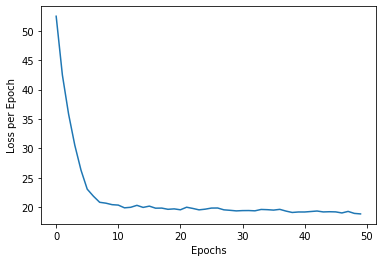

In [38]:
loss_per_epoch=model5.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)
plt.xlabel('Epochs')
plt.ylabel('Loss per Epoch')

In [39]:
import math

In [40]:
#import math
plot_predictions1(model5,bkX_val,bky_val,'Brooklyn')

2/2 [==============================] - 1s 7ms/step


15.0801882425944 21.095890028978523 0.6086152757861203


In [42]:
plot_predictions1(model5,bkX_test,bky_test,'Brooklyn')

4/4 [==============================] - 0s 5ms/step


17.116055317023086 22.015687204816956 0.5529702819938526


##Queens

In [35]:
model10 = Sequential()
model10.add(InputLayer((3, 13)))
#model10.add(LSTM(64,return_sequences=True))
# model10.add(LSTM(512,activation='relu',return_sequences=True))
# model10.add(LSTM(256,activation='relu',return_sequences=True))
#model10.add(LSTM(64,activation='relu',return_sequences=True))
# model10.add(LSTM(32,activation='relu',return_sequences=True))
# model10.add(LSTM(32,activation='relu',return_sequences=True))
model10.add(LSTM(100,activation='relu'))
model10.add(Dense(256, kernel_initializer='normal',activation='relu'))
model10.add(Dense(256, kernel_initializer='normal',activation='relu'))
model10.add(Dense(256, kernel_initializer='normal',activation='relu'))
#model10.add(Dense(256, kernel_initializer='normal',activation='relu'))
# model10.add(Dense(256, kernel_initializer='normal',activation='relu'))
model10.add(Dense(1, kernel_initializer='normal',activation='linear'))
#model10.add(Dropout(.1))

model10.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 100)               45600     
                                                                 
 dense_10 (Dense)            (None, 256)               25856     
                                                                 
 dense_11 (Dense)            (None, 256)               65792     
                                                                 
 dense_12 (Dense)            (None, 256)               65792     
                                                                 
 dense_13 (Dense)            (None, 1)                 257       
                                                                 
Total params: 203,297
Trainable params: 203,297
Non-trainable params: 0
_________________________________________________________________


In [36]:
model11 = Sequential()
model11.add(InputLayer((3, 13)))
#model11.add(LSTM(64,return_sequences=True))
# model11.add(LSTM(512,activation='relu',return_sequences=True))
# model11.add(LSTM(256,activation='relu',return_sequences=True))
#model11.add(LSTM(64,activation='relu',return_sequences=True))
model11.add(LSTM(16,activation='relu',return_sequences=True))
model11.add(LSTM(16,activation='relu',return_sequences=True))
model11.add(LSTM(16,activation='relu',return_sequences=True))
model11.add(LSTM(16,activation='relu'))
model11.add(Dense(64, kernel_initializer='normal',activation='relu'))
model11.add(Dense(64, kernel_initializer='normal',activation='relu'))
model11.add(Dense(64, kernel_initializer='normal',activation='relu'))
model11.add(Dense(64, kernel_initializer='normal',activation='relu'))
model11.add(Dense(64, kernel_initializer='normal',activation='relu'))
# model11.add(Dense(256, kernel_initializer='normal',activation='relu'))
model11.add(Dense(1, kernel_initializer='normal',activation='linear'))
#model11.add(Dropout(.1))

model11.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 3, 16)             1920      
                                                                 
 lstm_12 (LSTM)              (None, 3, 16)             2112      
                                                                 
 lstm_13 (LSTM)              (None, 3, 16)             2112      
                                                                 
 lstm_14 (LSTM)              (None, 16)                2112      
                                                                 
 dense_14 (Dense)            (None, 64)                1088      
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 64)               

In [41]:
cp6 = ModelCheckpoint('model6/', save_best_only=True)
model10.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.01), metrics=['mae'])
model10.fit(qnsX_train, qnsy_train, validation_data=(qnsX_val, qnsy_val), epochs=100,  shuffle=True)# callbacks=[es, rlr, mcp, tb]

Epoch 1/100
11/11 [==============================] - 4s 117ms/step - loss: 51.2957 - mae: 51.2957 - val_loss: 33.0017 - val_mae: 33.0017
Epoch 2/100
11/11 [==============================] - 0s 26ms/step - loss: 29.9616 - mae: 29.9616 - val_loss: 25.7095 - val_mae: 25.7095
Epoch 3/100
11/11 [==============================] - 0s 20ms/step - loss: 26.5780 - mae: 26.5780 - val_loss: 26.4009 - val_mae: 26.4009
Epoch 4/100
11/11 [==============================] - 0s 28ms/step - loss: 23.8606 - mae: 23.8606 - val_loss: 26.3197 - val_mae: 26.3197
Epoch 5/100
11/11 [==============================] - 0s 19ms/step - loss: 26.7724 - mae: 26.7724 - val_loss: 27.6262 - val_mae: 27.6262
Epoch 6/100
11/11 [==============================] - 0s 22ms/step - loss: 24.7053 - mae: 24.7053 - val_loss: 27.5385 - val_mae: 27.5385
Epoch 7/100
11/11 [==============================] - 0s 21ms/step - loss: 23.1742 - mae: 23.1742 - val_loss: 25.0476 - val_mae: 25.0476
Epoch 8/100
11/11 [============================

In [38]:
import math

In [42]:
plot_predictions1(model10,qnsX_val,qnsy_val,'Queens')

2/2 [==============================] - 0s 6ms/step


22.088015225728356 26.226460870949925 1.7560049920224776


In [43]:
plot_predictions1(model10,qnsX_test,qnsy_test,'Queens')

4/4 [==============================] - 0s 6ms/step


18.547649545085672 22.60668048845506 1.0882110517439552


##Bronx

In [43]:
cp7 = ModelCheckpoint('model6/', save_best_only=True)
model5.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.01), metrics=['mae'])
model5.fit(bxX_train, bxy_train, validation_data=(bkX_val, bxy_val), epochs=50,  shuffle=True)# callbacks=[es, rlr, mcp, tb]

Epoch 1/50
12/12 [==============================] - 3s 60ms/step - loss: 24.6388 - mae: 24.6388 - val_loss: 20.9827 - val_mae: 20.9827
Epoch 2/50
12/12 [==============================] - 0s 8ms/step - loss: 24.0581 - mae: 24.0581 - val_loss: 21.9292 - val_mae: 21.9292
Epoch 3/50
12/12 [==============================] - 0s 12ms/step - loss: 23.7995 - mae: 23.7995 - val_loss: 21.6129 - val_mae: 21.6129
Epoch 4/50
12/12 [==============================] - 0s 8ms/step - loss: 23.7111 - mae: 23.7111 - val_loss: 22.6212 - val_mae: 22.6212
Epoch 5/50
12/12 [==============================] - 0s 8ms/step - loss: 23.4338 - mae: 23.4338 - val_loss: 21.7669 - val_mae: 21.7669
Epoch 6/50
12/12 [==============================] - 0s 11ms/step - loss: 23.3882 - mae: 23.3882 - val_loss: 22.8028 - val_mae: 22.8028
Epoch 7/50
12/12 [==============================] - 0s 8ms/step - loss: 23.3370 - mae: 23.3370 - val_loss: 22.9068 - val_mae: 22.9068
Epoch 8/50
12/12 [==============================] - 0s 9ms/

In [44]:
plot_predictions1(model5,bxX_val,bxy_val,"Bronx")

2/2 [==============================] - 1s 9ms/step


13.721671541999367 17.349631890303463 1.2777826240252448


In [45]:
plot_predictions1(model5,bxX_test,bxy_test,"Bronx")

4/4 [==============================] - 0s 4ms/step


13.705247722807382 17.08795074696033 0.9396360291894051


##Manhattan

In [47]:
cp9 = ModelCheckpoint('model6/', save_best_only=True)
model10.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.01), metrics=['mae'])
model10.fit(manX_train,many_train, validation_data=(manX_val,many_val), epochs=150)#,  shuffle=True

Epoch 1/150
11/11 [==============================] - 6s 94ms/step - loss: 26.4886 - mae: 26.4886 - val_loss: 26.1960 - val_mae: 26.1960
Epoch 2/150
11/11 [==============================] - 0s 28ms/step - loss: 21.7304 - mae: 21.7304 - val_loss: 26.8075 - val_mae: 26.8075
Epoch 3/150
11/11 [==============================] - 0s 30ms/step - loss: 21.1404 - mae: 21.1404 - val_loss: 25.8816 - val_mae: 25.8816
Epoch 4/150
11/11 [==============================] - 0s 21ms/step - loss: 21.6579 - mae: 21.6579 - val_loss: 26.2923 - val_mae: 26.2923
Epoch 5/150
11/11 [==============================] - 0s 27ms/step - loss: 20.4653 - mae: 20.4653 - val_loss: 26.0948 - val_mae: 26.0948
Epoch 6/150
11/11 [==============================] - 0s 27ms/step - loss: 20.2262 - mae: 20.2262 - val_loss: 26.5567 - val_mae: 26.5567
Epoch 7/150
11/11 [==============================] - 0s 20ms/step - loss: 19.9396 - mae: 19.9396 - val_loss: 26.3888 - val_mae: 26.3888
Epoch 8/150
11/11 [=============================

In [48]:
plot_predictions1(model10,manX_val,many_val,'Manhattan')

2/2 [==============================] - 0s 8ms/step


27.924560746086968 35.012109452222084 0.7419587526272619


In [49]:
plot_predictions1(model10,manX_test,many_test,'Manhattan')

4/4 [==============================] - 0s 4ms/step


19.480315379834256 26.560766754889077 1.4288439354692075


##Staten ISland

In [49]:
cp6 = ModelCheckpoint('model6/', save_best_only=True)
model5.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.01), metrics=['mae'])
model5.fit(siX_train,siy_train, validation_data=(siX_val,siy_val), epochs=50)#,  shuffle=True

Epoch 1/50
9/9 [==============================] - 8s 257ms/step - loss: 22.9331 - mae: 22.9331 - val_loss: 20.5017 - val_mae: 20.5017
Epoch 2/50
9/9 [==============================] - 0s 22ms/step - loss: 21.6441 - mae: 21.6441 - val_loss: 20.2793 - val_mae: 20.2793
Epoch 3/50
9/9 [==============================] - 0s 24ms/step - loss: 21.3824 - mae: 21.3824 - val_loss: 20.0817 - val_mae: 20.0817
Epoch 4/50
9/9 [==============================] - 0s 26ms/step - loss: 20.8862 - mae: 20.8862 - val_loss: 19.9891 - val_mae: 19.9891
Epoch 5/50
9/9 [==============================] - 0s 18ms/step - loss: 20.5817 - mae: 20.5817 - val_loss: 19.7416 - val_mae: 19.7416
Epoch 6/50
9/9 [==============================] - 0s 36ms/step - loss: 20.4730 - mae: 20.4730 - val_loss: 20.1819 - val_mae: 20.1819
Epoch 7/50
9/9 [==============================] - 0s 49ms/step - loss: 20.2057 - mae: 20.2057 - val_loss: 20.3937 - val_mae: 20.3937
Epoch 8/50
9/9 [==============================] - 0s 36ms/step - los

In [50]:
plot_predictions1(model5,siX_val,siy_val, 'Staten Island')

2/2 [==============================] - 0s 8ms/step


16.442216262817382 22.555483702284132 0.5298277584769527


In [51]:
plot_predictions1(model5,siX_test,siy_test, 'Staten Island')

3/3 [==============================] - 0s 4ms/step


17.10749290215818 21.791635359810904 1.1238836289784382


##Property type

##Multifam

In [52]:
cp6 = ModelCheckpoint('model6/', save_best_only=True)
model5.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.01), metrics=['mae'])
model5.fit(mhX_train,mhy_train, validation_data=(mhX_val,mhy_val), epochs=50)#,  shuffle=True

Epoch 1/50
22/22 [==============================] - 3s 33ms/step - loss: 24.9918 - mae: 24.9918 - val_loss: 21.8666 - val_mae: 21.8666
Epoch 2/50
22/22 [==============================] - 0s 7ms/step - loss: 24.0226 - mae: 24.0226 - val_loss: 22.8942 - val_mae: 22.8942
Epoch 3/50
22/22 [==============================] - 0s 7ms/step - loss: 24.0174 - mae: 24.0174 - val_loss: 22.4999 - val_mae: 22.4999
Epoch 4/50
22/22 [==============================] - 0s 7ms/step - loss: 23.8871 - mae: 23.8871 - val_loss: 22.4617 - val_mae: 22.4617
Epoch 5/50
22/22 [==============================] - 0s 7ms/step - loss: 23.4740 - mae: 23.4740 - val_loss: 22.5146 - val_mae: 22.5146
Epoch 6/50
22/22 [==============================] - 0s 7ms/step - loss: 23.6280 - mae: 23.6280 - val_loss: 22.4560 - val_mae: 22.4560
Epoch 7/50
22/22 [==============================] - 0s 7ms/step - loss: 23.5506 - mae: 23.5506 - val_loss: 22.3844 - val_mae: 22.3844
Epoch 8/50
22/22 [==============================] - 0s 7ms/st

In [53]:
plot_predictions1(model5,mhX_val,mhy_val, 'Multifam')

4/4 [==============================] - 0s 4ms/step


17.565763415712297 22.03514403086046 1.2718993092204842


In [ ]:
17.968176562376698 23.539098040640713 1.376508659778229

In [61]:
plot_predictions1(model5,mhX_test,mhy_test, 'Multifamily')

7/7 [==============================] - 0s 3ms/step


16.437612379440154 21.417767340558548 1.0995022319279701


##Coll/Dorms

In [55]:
cp6 = ModelCheckpoint('model6/', save_best_only=True)
model5.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.01), metrics=['mae'])
model5.fit(collX_train,colly_train, validation_data=(collX_val,colly_val), epochs=50)#,  shuffle=True

Epoch 1/50
18/18 [==============================] - 3s 39ms/step - loss: 20.6960 - mae: 20.6960 - val_loss: 22.7170 - val_mae: 22.7170
Epoch 2/50
18/18 [==============================] - 0s 6ms/step - loss: 19.0993 - mae: 19.0993 - val_loss: 22.2349 - val_mae: 22.2349
Epoch 3/50
18/18 [==============================] - 0s 7ms/step - loss: 18.3603 - mae: 18.3603 - val_loss: 22.1420 - val_mae: 22.1420
Epoch 4/50
18/18 [==============================] - 0s 7ms/step - loss: 17.7655 - mae: 17.7655 - val_loss: 22.2805 - val_mae: 22.2805
Epoch 5/50
18/18 [==============================] - 0s 6ms/step - loss: 17.6472 - mae: 17.6472 - val_loss: 21.6218 - val_mae: 21.6218
Epoch 6/50
18/18 [==============================] - 0s 7ms/step - loss: 17.4452 - mae: 17.4452 - val_loss: 22.3378 - val_mae: 22.3378
Epoch 7/50
18/18 [==============================] - 0s 6ms/step - loss: 17.3158 - mae: 17.3158 - val_loss: 21.9555 - val_mae: 21.9555
Epoch 8/50
18/18 [==============================] - 0s 8ms/st

In [56]:
plot_predictions1(model5,collX_val,colly_val, 'College')

3/3 [==============================] - 0s 6ms/step


15.039710857984876 20.46072368391606 0.7838667122595273


In [57]:
plot_predictions1(model5,collX_test,colly_test, 'College')

6/6 [==============================] - 0s 3ms/step


15.36244357524474 19.413663005800245 0.29799144801610167


##Office

In [58]:
cp6 = ModelCheckpoint('model6/', save_best_only=True)
model5.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.01), metrics=['mae'])
model5.fit(offX_train,offy_train, validation_data=(offX_val,offy_val), epochs=50)#,  shuffle=True

Epoch 1/50
11/11 [==============================] - 3s 60ms/step - loss: 22.4847 - mae: 22.4847 - val_loss: 21.2632 - val_mae: 21.2632
Epoch 2/50
11/11 [==============================] - 0s 7ms/step - loss: 21.1704 - mae: 21.1704 - val_loss: 21.2959 - val_mae: 21.2959
Epoch 3/50
11/11 [==============================] - 0s 7ms/step - loss: 20.8014 - mae: 20.8014 - val_loss: 21.2082 - val_mae: 21.2082
Epoch 4/50
11/11 [==============================] - 0s 8ms/step - loss: 20.4130 - mae: 20.4130 - val_loss: 21.3117 - val_mae: 21.3117
Epoch 5/50
11/11 [==============================] - 0s 8ms/step - loss: 19.9969 - mae: 19.9969 - val_loss: 21.2155 - val_mae: 21.2155
Epoch 6/50
11/11 [==============================] - 0s 7ms/step - loss: 19.9481 - mae: 19.9481 - val_loss: 20.6177 - val_mae: 20.6177
Epoch 7/50
11/11 [==============================] - 0s 7ms/step - loss: 19.6839 - mae: 19.6839 - val_loss: 20.8050 - val_mae: 20.8050
Epoch 8/50
11/11 [==============================] - 0s 7ms/st

In [59]:
plot_predictions1(model5,offX_val,offy_val, 'Office')

2/2 [==============================] - 0s 8ms/step


13.042770502302382 18.358715288127353 0.5079288556901761


In [ ]:
16.01474721961551 20.65878116740645

In [60]:
plot_predictions1(model5,offX_test,offy_test, 'Office')

4/4 [==============================] - 0s 4ms/step


17.905810984713106 25.52503478978394 2.5038819443678433
